# Importing Libraries

In [1]:
library(tidyverse)
library(caret)
library(e1071)
library(corrplot)
library(caTools)
library(rpart)
library(rpart.plot)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.1     v purrr   0.3.4
v tibble  3.0.1     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Warning message:
"package 'e1071' was built under R version 3.6.3"corrplot 0.84 loaded


# Importing and Describing Data

In [2]:
df <- read.csv('C://Users//neelg//Downloads//WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
dim(df)

[1] 7043   21

In [4]:
colnames(df)

[1] "customerID"       "gender"           "SeniorCitizen"    "Partner"         
 [5] "Dependents"       "tenure"           "PhoneService"     "MultipleLines"   
 [9] "InternetService"  "OnlineSecurity"   "OnlineBackup"     "DeviceProtection"
[13] "TechSupport"      "StreamingTV"      "StreamingMovies"  "Contract"        
[17] "PaperlessBilling" "PaymentMethod"    "MonthlyCharges"   "TotalCharges"    
[21] "Churn"

In [5]:
summary(df)

      customerID      gender     SeniorCitizen    Partner    Dependents
 0002-ORFBO:   1   Female:3488   Min.   :0.0000   No :3641   No :4933  
 0003-MKNFE:   1   Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110  
 0004-TLHLJ:   1                 Median :0.0000                        
 0011-IGKFF:   1                 Mean   :0.1621                        
 0013-EXCHZ:   1                 3rd Qu.:0.0000                        
 0013-MHZWF:   1                 Max.   :1.0000                        
 (Other)   :7037                                                       
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 0.00   No : 682     No              :3390   DSL        :2421  
 1st Qu.: 9.00   Yes:6361     No phone service: 682   Fiber optic:3096  
 Median :29.00                Yes             :2971   No         :1526  
 Mean   :32.37                                                          
 3rd Qu.:55.00                                             

In [6]:
str(df)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

In [7]:
df$customerID <- NULL

In [8]:
df$SeniorCitizen <- as.factor(df$SeniorCitizen)

## Finding and Removing Missing Data

In [9]:
sapply(df, function(x) sum(is.na(x)))

gender    SeniorCitizen          Partner       Dependents 
               0                0                0                0 
          tenure     PhoneService    MultipleLines  InternetService 
               0                0                0                0 
  OnlineSecurity     OnlineBackup DeviceProtection      TechSupport 
               0                0                0                0 
     StreamingTV  StreamingMovies         Contract PaperlessBilling 
               0                0                0                0 
   PaymentMethod   MonthlyCharges     TotalCharges            Churn 
               0                0               11                0

In [10]:
df[!complete.cases(df), ]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
489,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NA,No
754,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NA,No
937,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NA,No
1083,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NA,No
1341,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NA,No
3332,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NA,No
3827,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NA,No
4381,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NA,No
5219,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NA,No
6671,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NA,No


In [11]:
df <- na.omit(df)

# Explantory Data Analysis

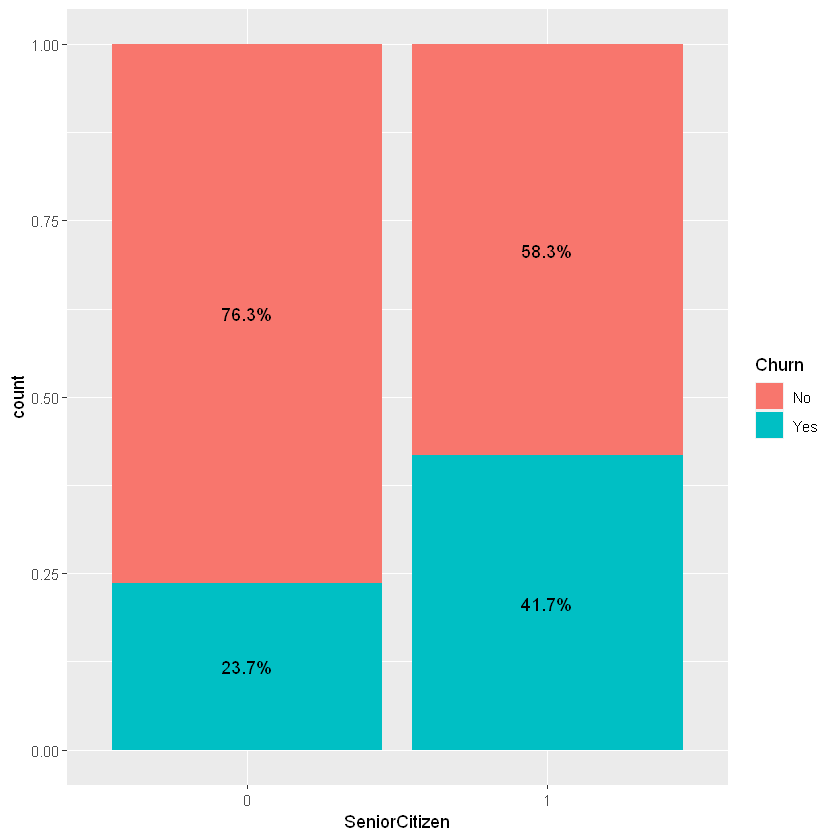

In [12]:
percentData <- df %>% group_by(SeniorCitizen) %>% count(Churn) %>%
    mutate(ratio=scales::percent(n/sum(n)))
ggplot(df, aes(x = SeniorCitizen,fill=Churn)) +  
geom_bar(position='fill') +
 geom_text(data=percentData, aes(y=n,label=ratio),
              position=position_fill(vjust=0.5))

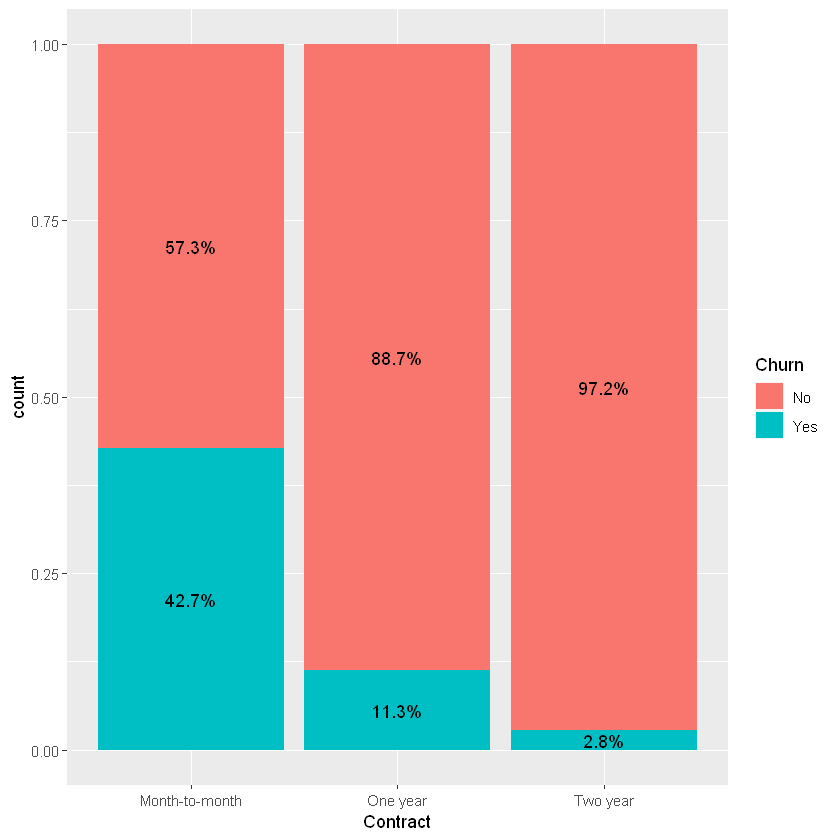

In [13]:
percentData <- df %>% group_by(Contract) %>% count(Churn) %>%
    mutate(ratio=scales::percent(n/sum(n)))
ggplot(df, aes(x = Contract,fill=Churn)) +  
geom_bar(position='fill') +
 geom_text(data=percentData, aes(y=n,label=ratio),
              position=position_fill(vjust=0.5))

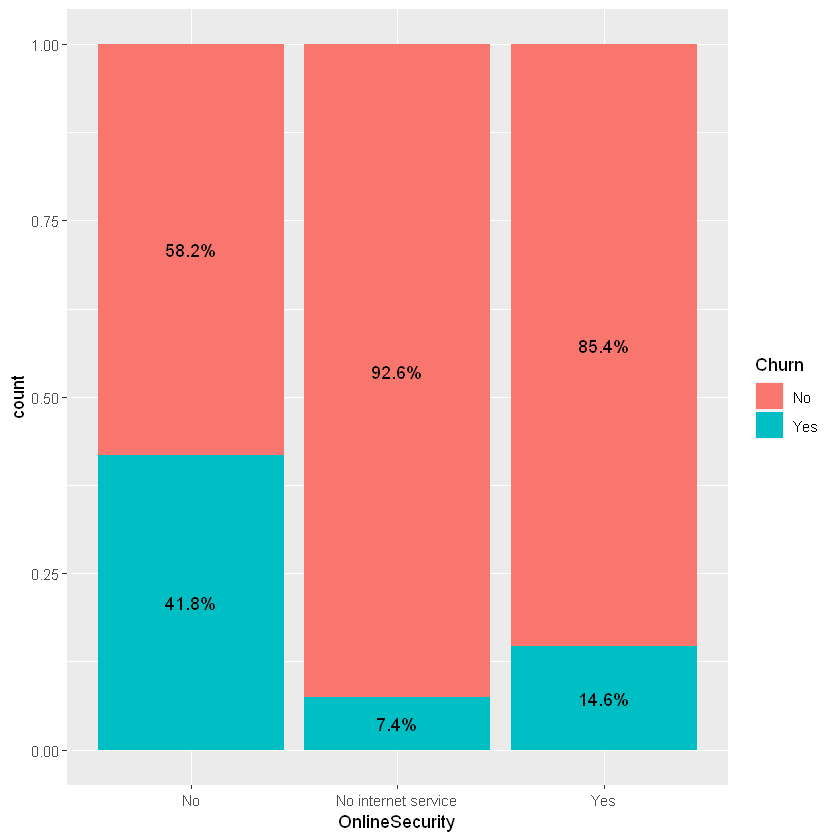

In [14]:
percentData <- df %>% group_by(OnlineSecurity) %>% count(Churn) %>%
    mutate(ratio=scales::percent(n/sum(n)))
ggplot(df, aes(x = OnlineSecurity,fill=Churn)) +  
geom_bar(position='fill') +
 geom_text(data=percentData, aes(y=n,label=ratio),
              position=position_fill(vjust=0.5))

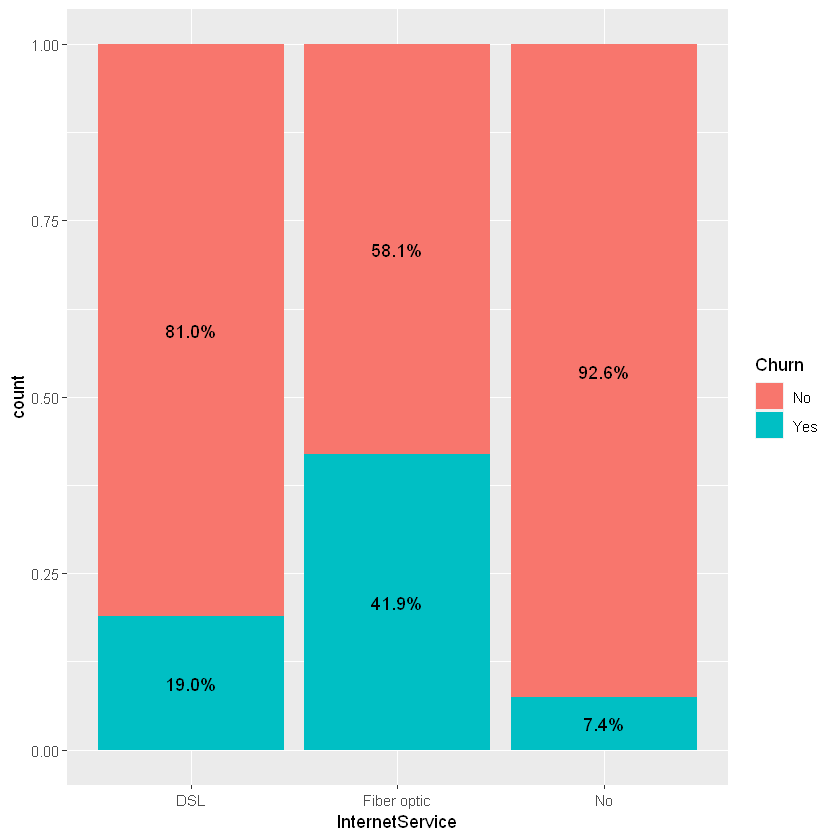

In [15]:
percentData <- df %>% group_by(InternetService) %>% count(Churn) %>%
    mutate(ratio=scales::percent(n/sum(n)))
ggplot(df, aes(x = InternetService,fill=Churn)) +  
geom_bar(position='fill') +
 geom_text(data=percentData, aes(y=n,label=ratio),
              position=position_fill(vjust=0.5))

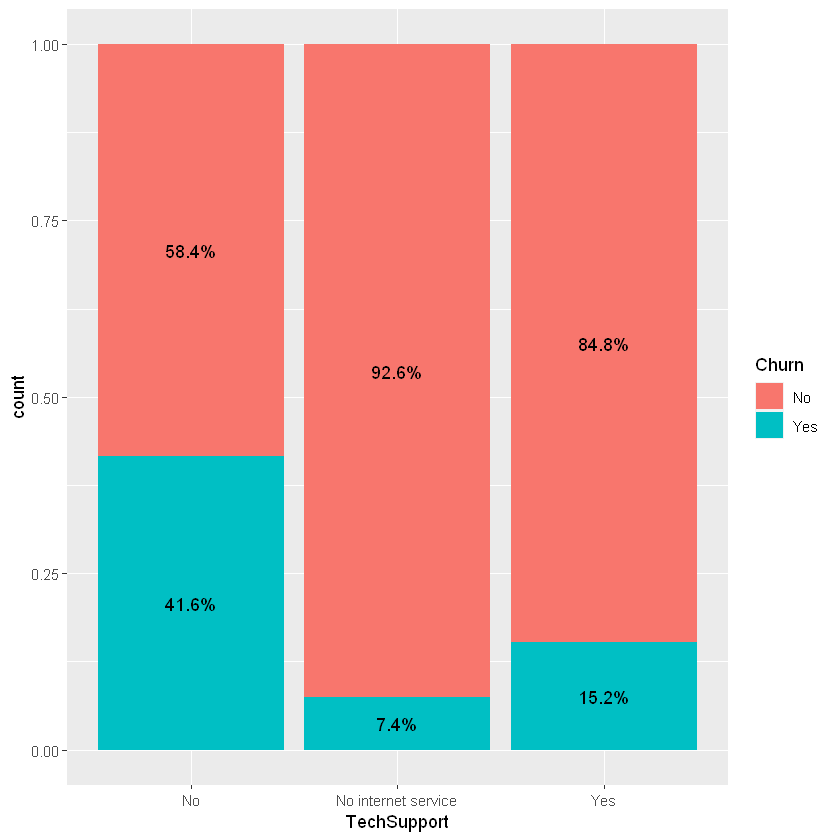

In [16]:
percentData <- df %>% group_by(TechSupport) %>% count(Churn) %>%
    mutate(ratio=scales::percent(n/sum(n)))
ggplot(df, aes(x = TechSupport,fill=Churn)) +  
geom_bar(position='fill') +
 geom_text(data=percentData, aes(y=n,label=ratio),
              position=position_fill(vjust=0.5))

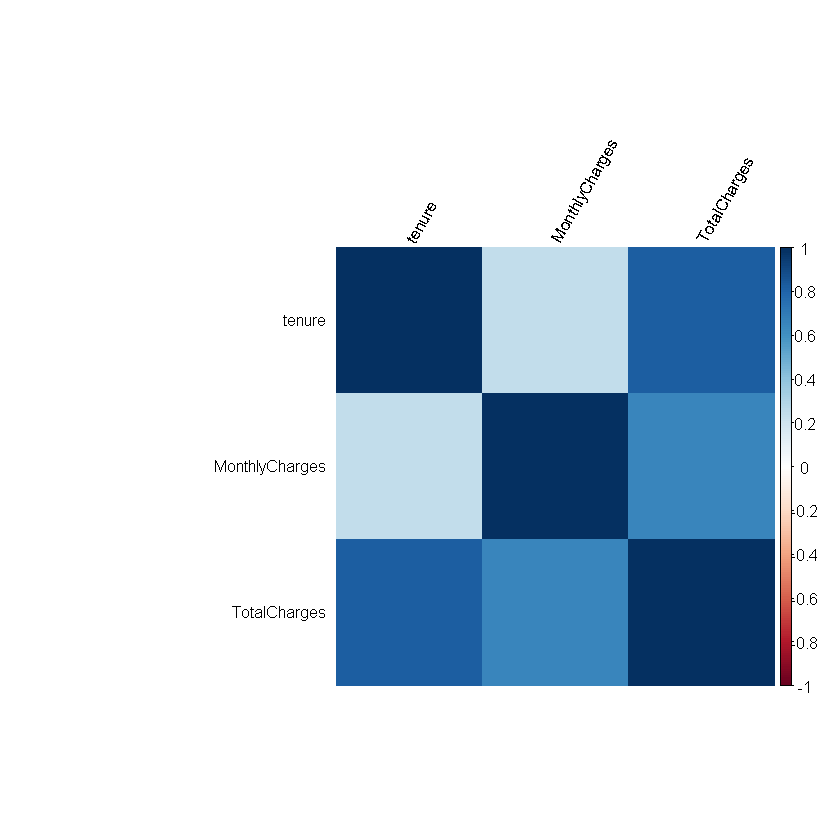

In [17]:
corrplot(cor(df[c(5,18,19)]), method = "color",tl.col="black", tl.cex=0.8, tl.srt=60)

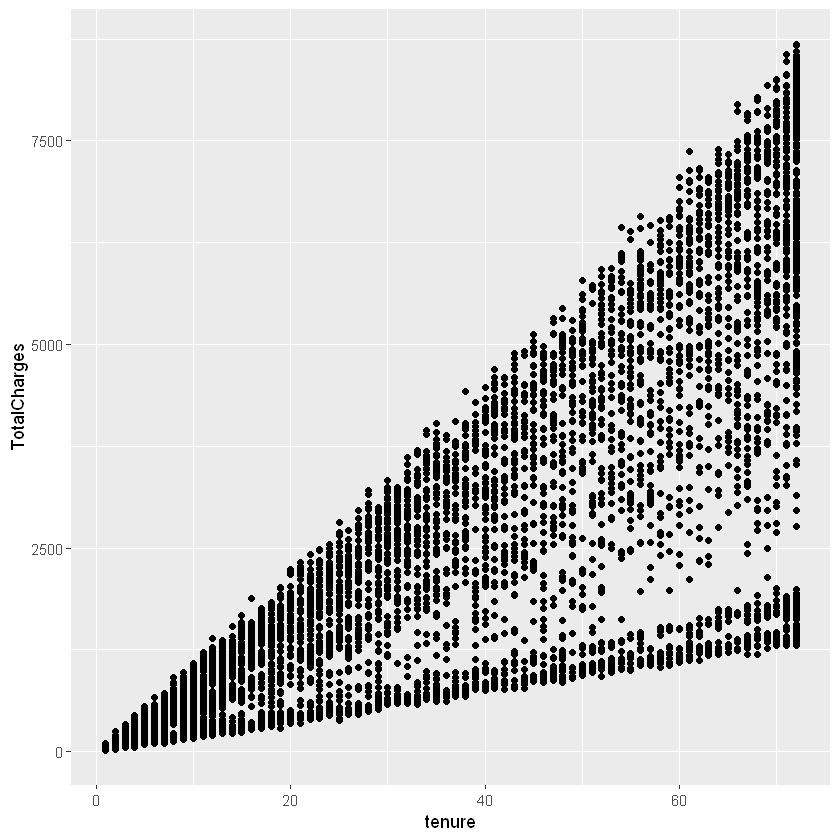

In [18]:
ggplot(df, aes(x=tenure, y=TotalCharges)) +
geom_point()

## Spliting Data into Train/Test Set

In [19]:
set.seed(430)
index = createDataPartition(df$Churn, p = 0.75, list = FALSE)
train = df[index,]
test = df[-index,]

# Logisitic Regression Model

In [20]:
model <- glm(Churn ~ ., family = "binomial", train)

In [21]:
pred<- predict(model, test,type='response')

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [22]:
pred_class <- ifelse(pred>0.5,'Yes','No')

In [23]:
confusionMatrix(as.factor(pred_class),test$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1176  209
       Yes  114  258
                                         
               Accuracy : 0.8162         
                 95% CI : (0.7972, 0.834)
    No Information Rate : 0.7342         
    P-Value [Acc > NIR] : 4.163e-16      
                                         
                  Kappa : 0.4963         
                                         
 Mcnemar's Test P-Value : 1.692e-07      
                                         
            Sensitivity : 0.9116         
            Specificity : 0.5525         
         Pos Pred Value : 0.8491         
         Neg Pred Value : 0.6935         
             Prevalence : 0.7342         
         Detection Rate : 0.6693         
   Detection Prevalence : 0.7883         
      Balanced Accuracy : 0.7320         
                                         
       'Positive' Class : No             
                                         

No vs. Yes,0.8636671


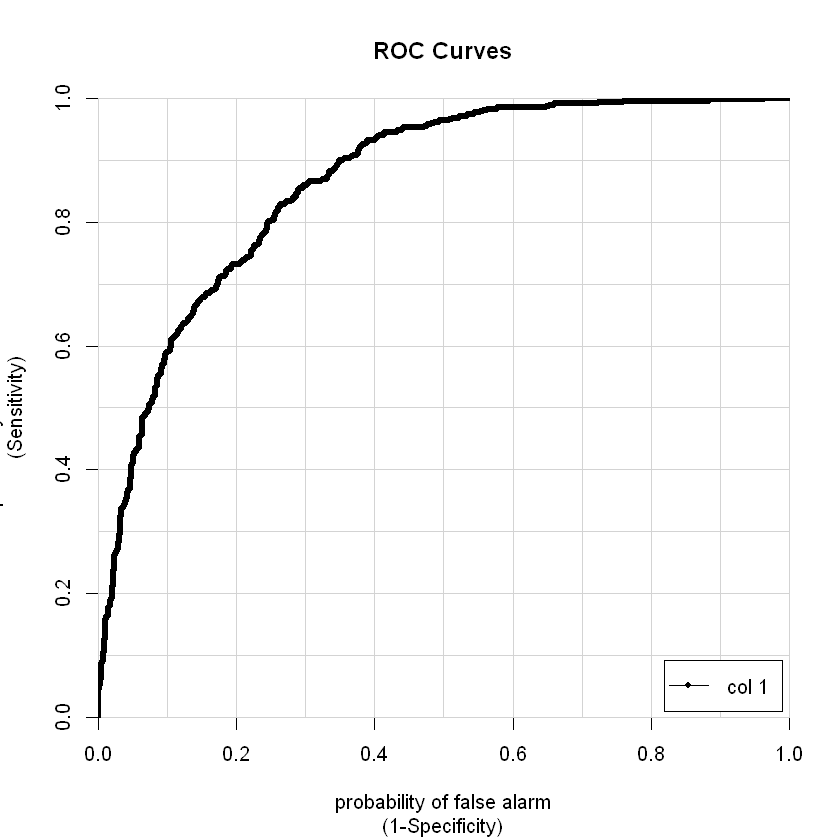

In [24]:
colAUC(pred, test$Churn, plotROC = TRUE)

# Decision Tree Model

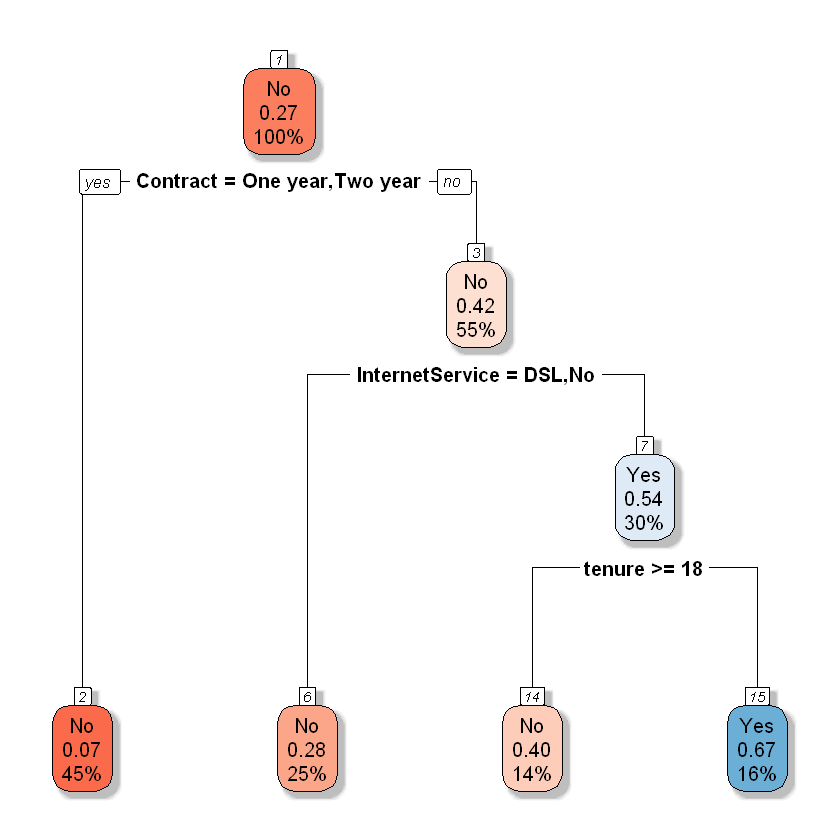

In [25]:
tree <- rpart(Churn~., data=train, cp=.02)
rpart.plot(tree, box.palette="RdBu", shadow.col="gray", nn=TRUE)

In [26]:
predict_tree <- predict(tree,test,type='class')

In [27]:
confusionMatrix(predict_tree,test$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1215  279
       Yes   75  188
                                        
               Accuracy : 0.7985        
                 95% CI : (0.779, 0.817)
    No Information Rate : 0.7342        
    P-Value [Acc > NIR] : 2.05e-10      
                                        
                  Kappa : 0.4002        
                                        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.9419        
            Specificity : 0.4026        
         Pos Pred Value : 0.8133        
         Neg Pred Value : 0.7148        
             Prevalence : 0.7342        
         Detection Rate : 0.6915        
   Detection Prevalence : 0.8503        
      Balanced Accuracy : 0.6722        
                                        
       'Positive' Class : No            
                                        

In [28]:
tree$variable.importance

Contract           tenure     TotalCharges   OnlineSecurity 
       318.20559        234.55898        160.58482        136.76318 
DeviceProtection      TechSupport   MonthlyCharges  InternetService 
       129.00050        114.54319        111.77911        102.07482 
   MultipleLines     OnlineBackup          Partner 
        46.56783         44.03275         13.33592